In [1]:
#borrador
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv("..\data\defects_data.csv")


In [8]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [7]:
grouped = df.groupby(['defect_type', 'defect_location', 'severity'])['repair_cost'].agg(
    ['mean', 'median', 'std', 'max', 'min']).reset_index()


grouped

,defect_type,defect_location,severity,mean,median,std,max,min
0,Cosmetic,Component,Critical,505.355588,495.480,311.588714,987.71,10.22
1,Cosmetic,Component,Minor,647.380857,714.630,270.194190,970.37,19.23
2,Cosmetic,Component,Moderate,592.017857,608.260,235.246544,967.29,97.53
3,Cosmetic,Internal,Critical,416.232286,422.030,264.790964,944.63,15.96
4,Cosmetic,Internal,Minor,493.353750,497.885,343.283777,967.35,18.42
5,Cosmetic,Internal,Moderate,572.571429,618.930,303.251805,990.02,67.49
6,Cosmetic,Surface,Critical,484.873947,508.350,271.195932,999.25,13.03
7,Cosmetic,Surface,Minor,491.822308,398.170,311.385678,998.27,18.61
8,Cosmetic,Surface,Moderate,459.676750,494.620,263.845847,960.72,32.44
9,Functional,Component,Critical,590.952821,641.580,288.150452,989.81,32.90


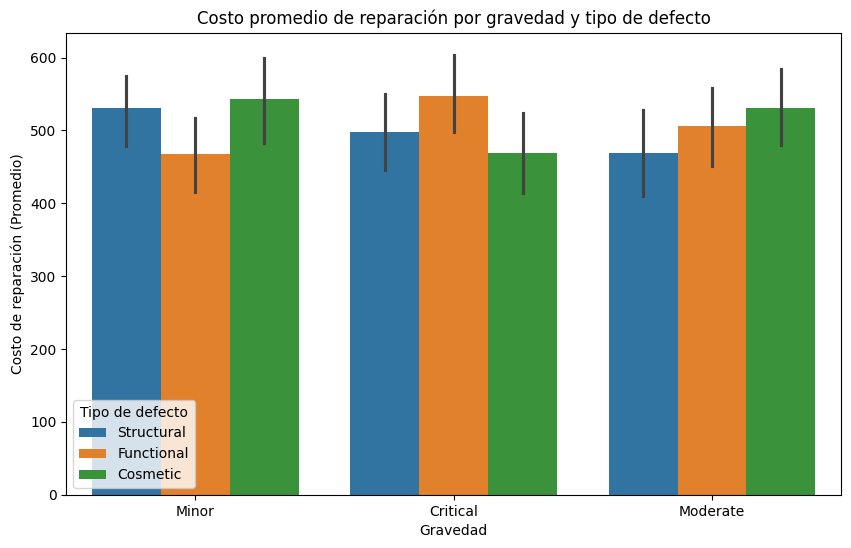

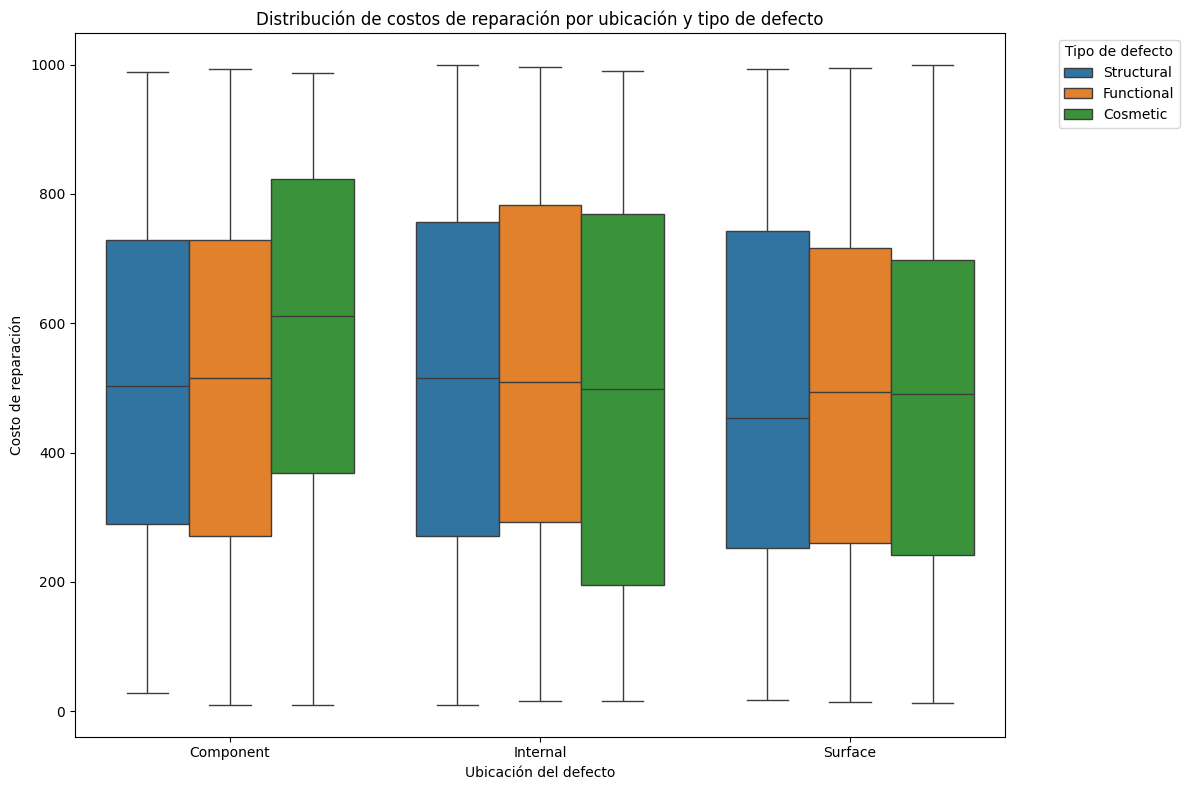

In [ ]:


# Gráfico de barras: promedio de repair_cost por gravedad (severity)
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='severity', y='repair_cost', hue='defect_type')
plt.title('Costo promedio de reparación por gravedad y tipo de defecto')
plt.ylabel('Costo de reparación (Promedio)')
plt.xlabel('Gravedad')
plt.legend(title='Tipo de defecto')
plt.show()

# Gráfico boxplot: análisis detallado por defect_type y defect_location
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='defect_location', y='repair_cost', hue='defect_type')
plt.title('Distribución de costos de reparación por ubicación y tipo de defecto')
plt.ylabel('Costo de reparación')
plt.xlabel('Ubicación del defecto')
plt.legend(title='Tipo de defecto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
grouped2 = df.groupby(['defect_type', 'severity'])['repair_cost'].agg(
    ['mean', 'median', 'std', 'max', 'min']).reset_index()

In [11]:
grouped2

,defect_type,severity,mean,median,std,max,min
0,Cosmetic,Critical,468.929252,449.630,282.525493,999.25,10.22
1,Cosmetic,Minor,543.648302,582.030,314.448189,998.27,18.42
2,Cosmetic,Moderate,531.203854,551.895,272.382375,990.02,32.44
3,Functional,Critical,547.788684,570.720,282.576262,996.60,27.24
4,Functional,Minor,467.276372,458.790,287.191755,997.03,10.44
5,Functional,Moderate,505.852143,522.280,297.541649,995.47,15.10
6,Structural,Critical,498.499196,478.615,285.506128,992.01,17.89
7,Structural,Minor,530.489353,529.160,279.190902,988.05,13.19
8,Structural,Moderate,468.850693,438.540,301.014762,999.64,10.55


In [12]:


# Contamos las incidencias por producto
product_incidents_count = df['product_id'].value_counts()

# Contamos las incidencias por mes (extraemos el mes de 'defect_date')
df['month'] = df['defect_date'].dt.to_period('M')
monthly_incidents = df['month'].value_counts().sort_index()

# Crear un subplot con 2 filas y 1 columna
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Primer gráfico: número de incidencias por producto
product_incidents_count.plot(kind='bar', color='lightblue', ax=axes[0])
axes[0].set_title('Número de Incidencias por Producto')
axes[0].set_xlabel('Producto')
axes[0].set_ylabel('Número de Incidencias')

# Segundo gráfico: incidencias por mes
monthly_incidents.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title('Número de Incidencias por Mes')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Número de Incidencias')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values